# Project: Analyze A/B Test Results For LandingPage


## Table of Contents:

- [Introduction](#intro)
- [Questions](#Quest)
- [Part I - Data Wrangling & Probability](#wrang&prob)
- [Part II - Exploratory Data Analysis(EDA) & Probability](#EDA&prob)
- [Part III - A/B Test](#ab_test)
- [Part IV - Regression](#regression)
- [Conclusions](#Concl)




<a id='intro'></a>
## Introduction

#### For this project, we will be working to understand the results of an A/B test run by an e-commerce website. we goal is to work through this notebook to help the company understand if they should:

<a id='Quest'></a>
## Questions
- Implement the New landing page, 
- Keep the Old landing page, or 
- Perhaps run the experiment longer to make their decision.

#### - First of all, let's import the basic and necessary libraries .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style("whitegrid")
pd.options.display.max_colwidth = 18
pd.options.display.max_columns = 50

<a id='wrang&prob'></a>
## Part I - Data Wrangling & Probability

#### We will do the following steps:

- Gathering data from the dataset and investigate it in an effort to understand more details about it.
- Performing a data assessment to identify any issues with data types, structure, or quality.
- Performing data cleaning by changing data types, replacing values, removing unnecessary data, and modifying the dataset for easier and faster analysis.


#### #Below is a description of this data set 

- **Campaign Name:** Target campaign type for ad landing page.

- **Spend [USD]:** The amount of money spent on advertising in the campaign.

- **of Impressions:** The number of people who viewed the ad in the campaign (contains repeated viewing of the same person for the ad).

- **Reach:** The number of unique people who saw the ad in the campaign.

- **of Website Clicks:** The number of users who clicked on the website link in the campaign's advertisement.

- **of Searches:** The number of users who performed a search on the website.

- **of View Content:** Number of users who have viewed product details.

- **of Add to Cart:** The number of users who have added the product to the cart.

- **of Purchase:** The number of users who have purchased the product.

- ### Gathering Data

**A.** Reading in the control group's data set from the `control_group.csv` file and take a look at the top few rows here:

In [2]:
df_cont= pd.read_csv('../input/example-dataset-for-ab-test/control_group.csv', sep = ";")
df_cont.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def to_clean(val):
    return val.strip().lower().replace("# ", "").replace("of ", "").replace(" ","_").replace("[usd]", "usd")


In [4]:
df_cont.rename(columns=to_clean, inplace= True)

In [5]:
df_cont.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**B.** Reading in the test group's data set from the control_group.csv file and take a look at the top few rows here:

In [6]:
df_test= pd.read_csv('../input/example-dataset-for-ab-test/test_group.csv', sep=';')

df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [7]:
df_test.rename(columns=to_clean, inplace= True)

In [8]:
df_test.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


<br>

- ### Assessing Data

**C.**Let's find out the number of rows in the both data set.

In [9]:
df_cont.shape

(30, 10)

In [10]:
df_test.shape

(30, 10)

&#9865; **That's great, the data set for each campaign is equal in number**<br><br>

**D.** Check the basic information of the both data frame.

In [11]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   30 non-null     object 
 1   date            30 non-null     object 
 2   spend_usd       30 non-null     int64  
 3   impressions     29 non-null     float64
 4   reach           29 non-null     float64
 5   website_clicks  29 non-null     float64
 6   searches        29 non-null     float64
 7   view_content    29 non-null     float64
 8   add_to_cart     29 non-null     float64
 9   purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_name   30 non-null     object
 1   date            30 non-null     object
 2   spend_usd       30 non-null     int64 
 3   impressions     30 non-null     int64 
 4   reach           30 non-null     int64 
 5   website_clicks  30 non-null     int64 
 6   searches        30 non-null     int64 
 7   view_content    30 non-null     int64 
 8   add_to_cart     30 non-null     int64 
 9   purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


&#9865; **The control data set has null values, and the data type of the columns from impression to purchase is different from the same columns in the test set, we will deal with this later.**<br><br>

**E.** Let's merge the two sets of data, so that one data set is placed below the other data set, as follows:

In [13]:
new_df = df_cont.merge(df_test, how='outer').sort_values(['date']).reset_index(drop= True)
new_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   60 non-null     object 
 1   date            60 non-null     object 
 2   spend_usd       60 non-null     int64  
 3   impressions     59 non-null     float64
 4   reach           59 non-null     float64
 5   website_clicks  59 non-null     float64
 6   searches        59 non-null     float64
 7   view_content    59 non-null     float64
 8   add_to_cart     59 non-null     float64
 9   purchase        59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


&#9865; **We now see that the data columns in the test group have also been automatically converted from type int64 to the same data type in the control group after they are included in it.**<br><br>


- ### Data cleaning<br><br>

**F.**Now let's also convert the date data type to match it.

In [15]:
new_df['date']= pd.to_datetime(new_df['date'])

In [16]:
new_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [17]:
new_df.tail()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
55,Control Campaign,2019-07-08,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
56,Test Campaign,2019-08-08,2916,33669.0,20149.0,7184.0,2867.0,2194.0,1240.0,431.0
57,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
58,Control Campaign,2019-09-08,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
59,Test Campaign,2019-09-08,2652,45511.0,31598.0,8259.0,2899.0,2761.0,1200.0,845.0


**G.** Let's check find there are duplicates in the data set

In [18]:
new_df.duplicated().sum()

0

&#9865; **Great, there are no duplicates in the data set.**

**H.** Now let's explore nulls to work with them.

In [19]:
new_df.isnull().sum()

campaign_name     0
date              0
spend_usd         0
impressions       1
reach             1
website_clicks    1
searches          1
view_content      1
add_to_cart       1
purchase          1
dtype: int64

In [20]:
new_df[new_df.isnull().any(axis= 1)]

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
51,Control Campaign,2019-05-08,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


&#9865; **As we can see that all null values cells are in the same row, so we will dispense with it and do a projection for it.**<br><br>


In [21]:
new_df.dropna(inplace= True)

In [22]:
new_df.isnull().any().sum()

0

=================================================================================================================

<a id='EDA&prob'></a>
## Part II - Exploratory Data Analysis(EDA) & Probability
#### Now we will explore the new_df dataset to answer the following questions:<br><br>

**A.** What is the total number of each campaign?

In [23]:
new_df.groupby(["campaign_name"])["campaign_name"].count()

campaign_name
Control Campaign    29
Test Campaign       30
Name: campaign_name, dtype: int64

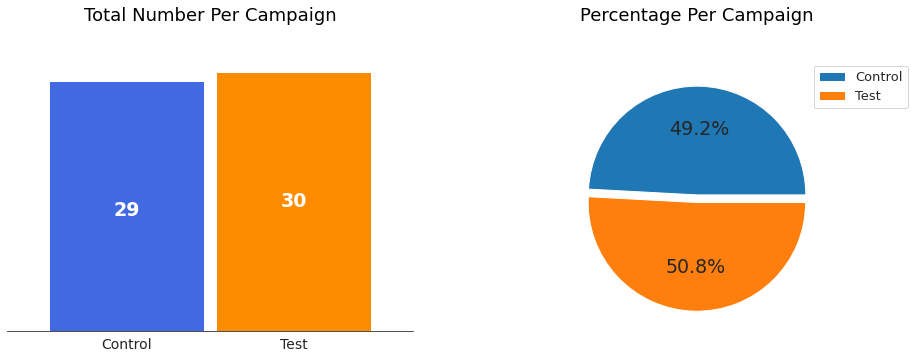

In [24]:
sns.set_style("white")

fig, ax = plt.subplots(1,2, figsize=(16,5), sharex=False)
c = sns.color_palette(["royalblue", "darkorange"], 2)


campaign= new_df.groupby(["campaign_name"])["campaign_name"].count()


campaign.plot(kind="bar",
                    rot = 0,
                    width = 0.93,
                    alpha = 1,
                    fontsize = 12,
                    color=c, ax=ax[0])

for i, g in enumerate(campaign):
    ax[0].text(i, g - 15, "{:0,.0f}".format(g), color='white',
               fontsize=19, fontweight="bold", ha="center", va='center')
    

ax[0].set_title("Total Number Per Campaign", fontsize=18, color="k", pad=38)
ax[0].set_xlabel('')
ax[0].set_xticklabels( labels=["Control", "Test"], fontsize=14)
ax[0].set_yticks([])
sns.despine(left=True);



ax[1].pie(campaign, autopct='%1.1f%%', textprops={'fontsize': 19},explode = (0, 0.07))
ax[1].set_title("Percentage Per Campaign",fontsize=18, pad=38, color="k")
ax[1].legend(fontsize=13, labels=[ "Control","Test"],bbox_to_anchor=(1.3, 1));



####  Based on these previous results, we find that:

- We see the difference between the two campaigns is very small and almost negligible, this can be deceptive, because it suggests that if we do A/B testing there will be no bias in one campaign over another.<br><br>

- But what interests us more precisely here is the amount of unique individual views for each campaign, so let's explore that.<br><br>

**B.** What is the total number for reach of each campaign?

In [25]:
new_df.groupby(["campaign_name"])["reach"].sum()

campaign_name
Control Campaign    2576503.0
Test Campaign       1604747.0
Name: reach, dtype: float64

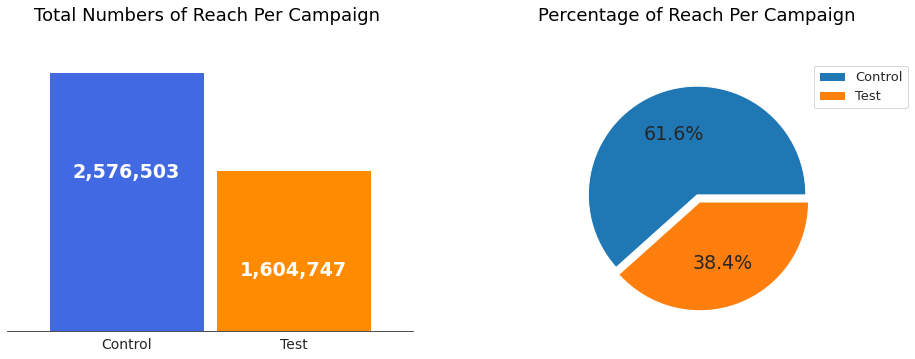

In [26]:
sns.set_style("white")

fig, ax = plt.subplots(1,2, figsize=(16,5), sharex=False)
c = sns.color_palette(["royalblue", "darkorange"], 2)


campaign2= new_df.groupby(["campaign_name"])["reach"].sum()


campaign2.plot(kind="bar",
                    rot = 0,
                    width = 0.93,
                    alpha = 1,
                    fontsize = 12,
                    color=c, ax=ax[0])

for i, g in enumerate(campaign2):
    ax[0].text(i, g - 1000000, "{:0,.0f}".format(g), color='white',
               fontsize=19, fontweight="bold", ha="center", va='center')
    

ax[0].set_title("Total Numbers of Reach Per Campaign ", fontsize=18, color="k", pad=38)
ax[0].set_xlabel('')
ax[0].set_xticklabels( labels=["Control", "Test"], fontsize=14)
ax[0].set_yticks([])
sns.despine(left=True);



ax[1].pie(campaign2, autopct='%1.1f%%', textprops={'fontsize': 19},explode = (0, 0.07))
ax[1].set_title("Percentage of Reach Per Campaign",fontsize=18, pad=38, color="k")
ax[1].legend(fontsize=13, labels=[ "Control","Test"],bbox_to_anchor=(1.3, 1));


- We now see that the rate and number of unique observations in the control is almost twice the rate and the number of observations in the test, which is very likely to result in a bias in the results when we do A / B tests.<br><br>

**C.** Now let's review the click-through rate (CTR) for each campaign.

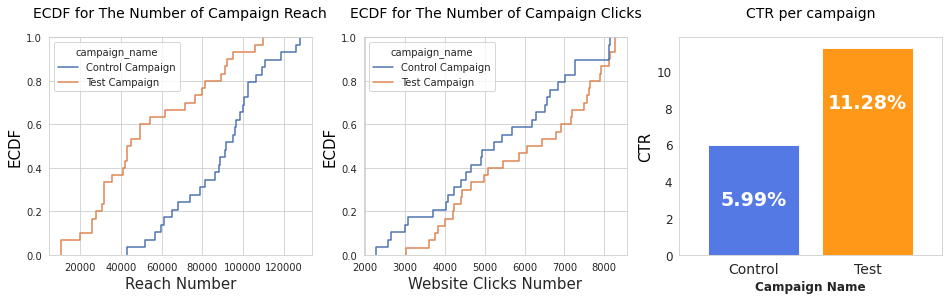

In [27]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3, figsize=(16,4), sharex=False)


sns.ecdfplot(x="reach",
             data=new_df,
             hue="campaign_name",
             palette="deep", ax=ax[0])


ax[0].set_title("ECDF for The Number of Campaign Reach", fontsize=14, color="k", pad=20)
ax[0].set_xlabel("Reach Number", fontsize=15)
ax[0].set_ylabel("ECDF", fontsize=15, color="k")



sns.ecdfplot(x="website_clicks",
             data=new_df,
             hue="campaign_name",
             palette="deep", ax=ax[1])

ax[1].set_title("ECDF for The Number of Campaign Clicks", fontsize=14, color="k", pad=20)
ax[1].set_xlabel("Website Clicks Number", fontsize=15)
ax[1].set_ylabel("ECDF", fontsize=15, color="k")


sns.set_style("white")

CTR = new_df.groupby(["campaign_name"])["website_clicks"].sum()/new_df.groupby(["campaign_name"])["reach"].sum()*100

CTR.plot(kind="bar",
                    rot = 0,
                    width = 0.80,
                    alpha = 0.9,
                    fontsize = 12,
                    color=c, ax=ax[2])


for i, g in enumerate(CTR):
    ax[2].text(i, g - 3, "{0:.{digits}f}%".format(g, digits=2), color='white',
               fontsize=19, fontweight="bold", ha="center", va='center')
    

ax[2].set_title("CTR per campaign", fontsize=14, color="k", pad=20)
ax[2].set_xlabel("Campaign Name", fontsize=12, fontweight="bold")
ax[2].set_ylabel("CTR", fontsize=15, color="k")
ax[2].set_xticklabels( labels=["Control", "Test"], fontsize=14);

- First, we see that the cumulative distribution of reach for the control is 90% greater than the cumulative distribution of the test.<br><br>

- Second, the cumulative click distribution of the control at 90% is almost equal to the cumulative distribution of the test item at the same level.<br><br>

- Third, unlike before, when we extracted that the rate of unique views in the control is greater than the test, we divided the number of clicks from them to extract the so-called click-through rate, we found that the click-through rate of the test became significantly greater than the control, and this indicates that There is a high probability that the number of individuals who clicked on the site link on the test  is significantly greater than the control, even though the control views are greater than the test.<br><br>

**D.** Now let's make a display of the cumulative distribution of the other columns.

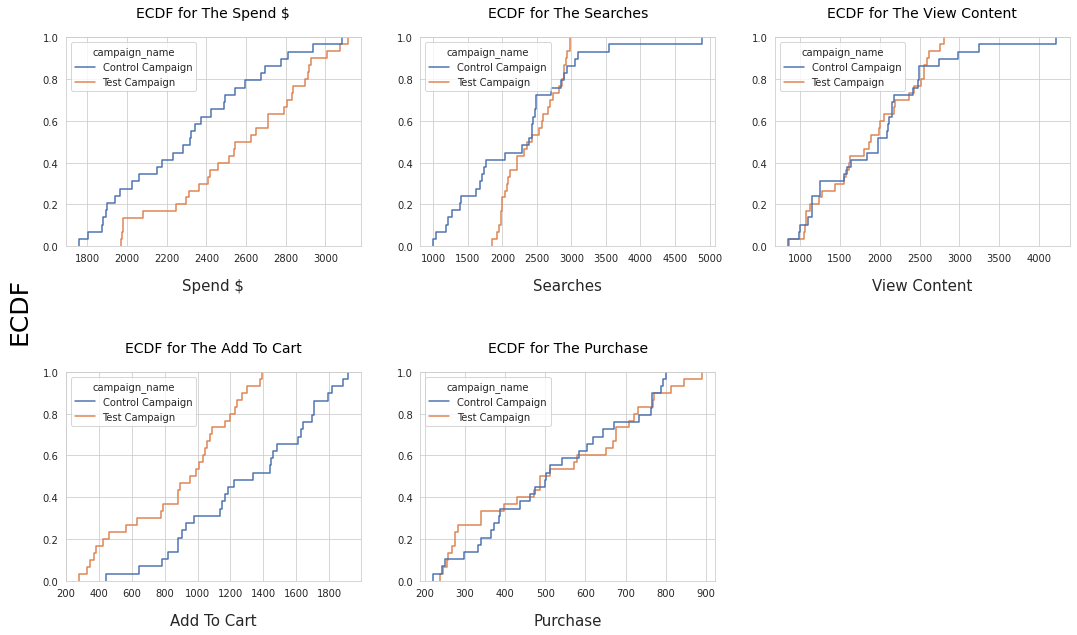

In [28]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(2,3, figsize=(18,10), sharex=False)

r=0
c=0


campaign_col= {'Spend $':'spend_usd', 
               'Searches':'searches', 
               'View Content':'view_content', 
               'Add To Cart':'add_to_cart',
               'Purchase':'purchase'}

for col in campaign_col:
    name = campaign_col[col]
    sns.ecdfplot(x= name,
                 data= new_df,
                 hue= "campaign_name", palette= "deep", ax=ax[r,c])
    
    ax[r,c].set_title("ECDF for The {}".format(col), fontsize=14, color="k", pad=20)
    ax[r,c].set_xlabel(col, fontsize=15, labelpad=15)
    ax[r,c].set_ylabel("")
    if c>=2:
        r+=1
        c=-1
    c+=1
    
plt.subplots_adjust(hspace = 0.6, wspace=0.2)
fig.supylabel('ECDF', fontsize=25, color="k", x= 0.08);

ax[1,2].set_yticks([])
ax[1,2].set_xticks([])
sns.despine(bottom=True, top=True, left=True, right=True, trim=True, ax=ax[1,2])

- The cumulative distribution of spending by about 98% is equal in both groups.
- The cumulative distribution of the number of searchers is about 95% significantly greater in the control group than in the test group.
- The cumulative distribution of the number of people viewing the content was about 95% significantly greater in the control group.
- The cumulative distribution of people who added to the basket was about 95% significantly greater in the control group.
- The cumulative distribution of people who made purchases was about 90% equal in the two groups, but about 95% was slightly greater in the test group.<br><br>

**E.** Now let's extract a statistical summary for each category based on the group

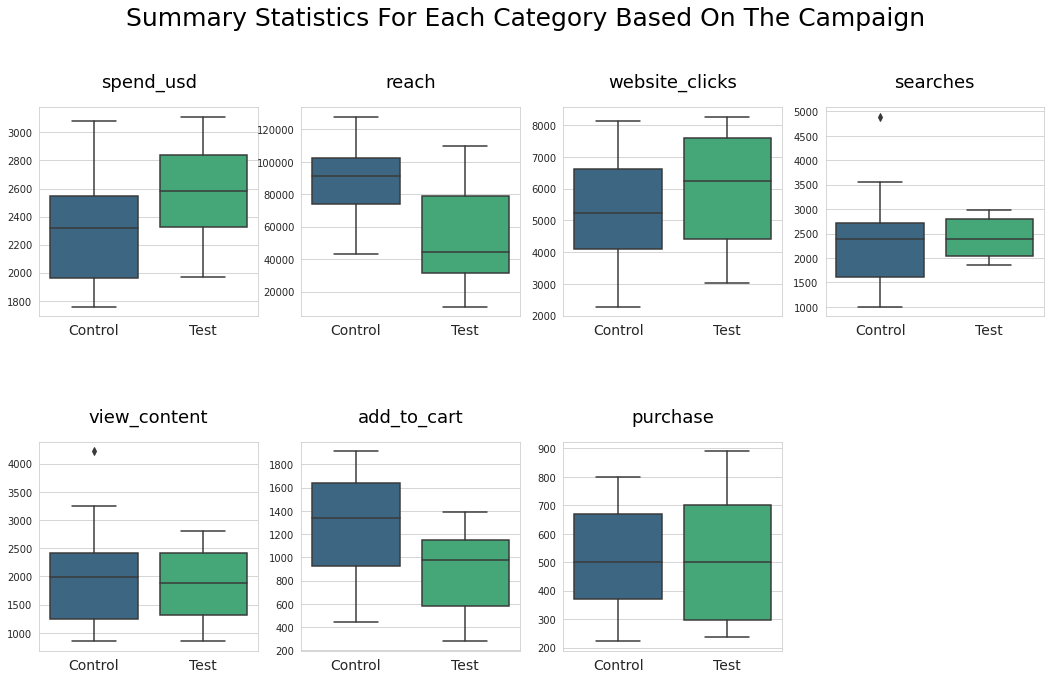

In [29]:
fig, ax = plt.subplots(2,4, figsize=(18,10), sharex=False)

cols= new_df.columns[np.r_[2,4:10]]

r=0
c=0

for col in cols:
    sns.boxplot(x= 'campaign_name',
                y= col,
                data= new_df,
                palette="viridis", ax=ax[r,c])
    ax[r,c].set_title(col, fontsize=18, color="k", pad=20)
    ax[r,c].set_xlabel('')
    ax[r,c].set_ylabel('')
    ax[r,c].set_xticklabels( labels=["Control", "Test"], fontsize=14)
    
    
    if c>=3:
        r+=1
        c=-1
    c+=1

plt.subplots_adjust(hspace = 0.6, wspace=0.2)
fig.suptitle("Summary Statistics For Each Category Based On The Campaign", fontsize=25, color="k", y=1.02)

ax[1,3].set_yticks([])
ax[1,3].set_xticks([])
sns.despine(bottom=True, top=True, left=True, right=True, trim=True, ax=ax[1,3])

- spend_usd: We find that the minimum amount of spending for the test group is somewhat greater than that of the control group, as well as the maximum, but to a lesser extent, and that more than 75% of the amount of spending for the test group is greater than 50% of the amount of spending for the control group.<br><br>

- reach: We found that the minimum of unique observations in the control group is significantly greater than the minimum in the test, as it is close to the 50% level of viewing in the test, and the maximum in the control is greater than the maximum in the test with a difference of about 10%.<br><br>

- website_click: Here we found the opposite that the minimum number of clicks in the control group is smaller than the minimum in the test group by a difference of about 10%, and that 50% of the number of clicks in the test is greater than 50% in the control, and the maximum in the test from the maximum in the control With a very small difference, which explains why the test group's CTR score is greater than the control.<br><br>

- searche: Although the minimum number of searches for the test group is greater than the 25% level of the number of research for the control, but we find that the total spread of data for the control is much greater than the test.<br><br>

- view_content: We find that the minimum and the first, second and third quartile levels of the view content numbers for both groups are very close, but the maximum for the control group was greater than the test with a difference of about 10%.

- add_to_cart: We found here that the minimum number of people who added to cart in the control group is greater than the minimum in the test, and that 25% of the number of people who added to cart  in the control group is greater than the maximum in the test.<br><br>

- purchase: Here the opposite happened a little, although the minimum and average number of purchases in the two groups are almost close, but that 25% of the maximum number of purchases in the control group is greater than 25% in the test group.<br><br>


**E.** Let's do a time series comparison of the spend vs. click-through rate of the two groups.

In [30]:
new_df['ctr']= new_df["website_clicks"]/new_df["reach"]

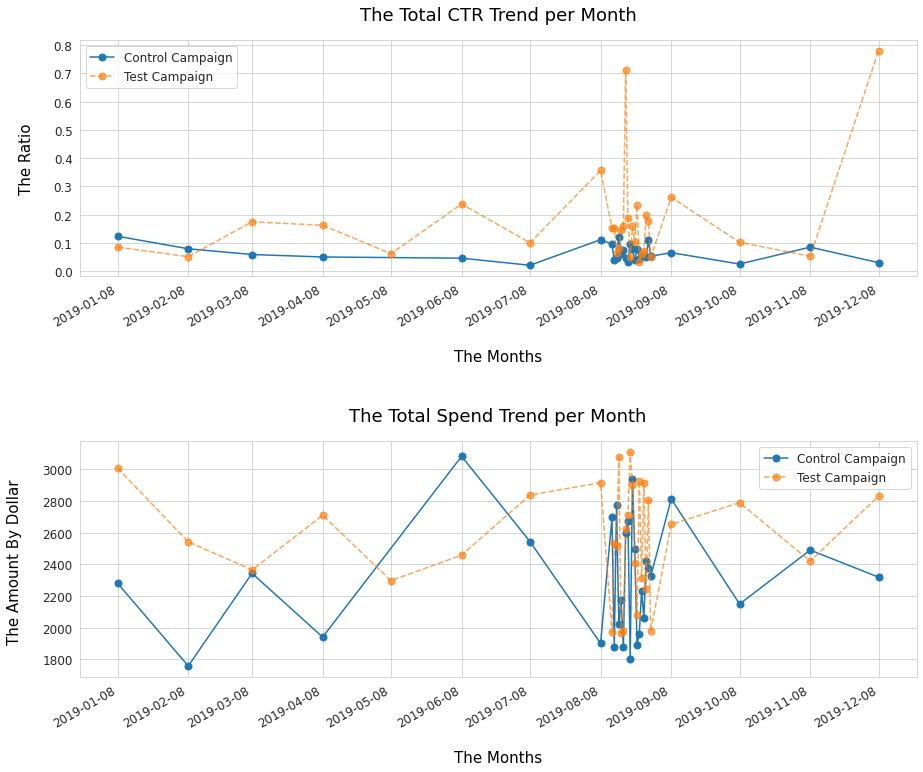

In [31]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(2,1,figsize=(15,13))

ctr_total= new_df.groupby(["campaign_name",'date'])["ctr"].sum()
spend_total=new_df.groupby(["campaign_name",'date'])["spend_usd"].sum()


ctr_total['Control Campaign'].plot(marker="o", ls='-',markersize=7,
                                       alpha = 1, fontsize = 12,
                                       label='Control Campaign',ax=ax[0])

ctr_total['Test Campaign'].plot(marker="o", ls='--',markersize=7,
                                    alpha = 0.7,fontsize = 12,
                                    label='Test Campaign', ax=ax[0])

spend_total['Control Campaign'].plot(marker="o", ls='-',markersize=7,
                                       alpha = 1, fontsize = 12,
                                       label='Control Campaign',ax=ax[1])

spend_total['Test Campaign'].plot(marker="o", ls='--',markersize=7,
                                    alpha = 0.7,fontsize = 12,
                                    label='Test Campaign', ax=ax[1])

ax[0].set_title("The Total CTR Trend per Month", fontsize=18, color="k", pad=20)
ax[0].set_xlabel("The Months", fontsize=15, color="k", labelpad=20, ha="center")
ax[0].set_ylabel("The Ratio",fontsize=15, color="k", labelpad=20, ha="center")
ax[0].set_xticks(np.array([datetime.datetime(2019, i, 8, 0, 0) for i in range(1,13,1)]))
ax[0].legend(fontsize=12)

ax[1].set_title("The Total Spend Trend per Month", fontsize=18, color="k", pad=20)
ax[1].set_xlabel("The Months", fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_ylabel("The Amount By Dollar ",fontsize=15, color="k", labelpad=20, ha="center")
ax[1].set_xticks(np.array([datetime.datetime(2019, i, 8, 0, 0) for i in range(1,13,1)]))
ax[1].legend(fontsize=12)

plt.subplots_adjust(hspace = 0.7, wspace=0.2);

&#9865; **We find from the beginning of month 1 to the end of month 7 that the spending rate had no significant effect on the click-through rate for the control group and had a slight effect on the test group, but from the beginning of the eighth month the spending rate for each group had a clear effect on the click rate To appear on the same group.**<br><br> 

**F.** Now let's explore the relationship of each category to spending.

In [32]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

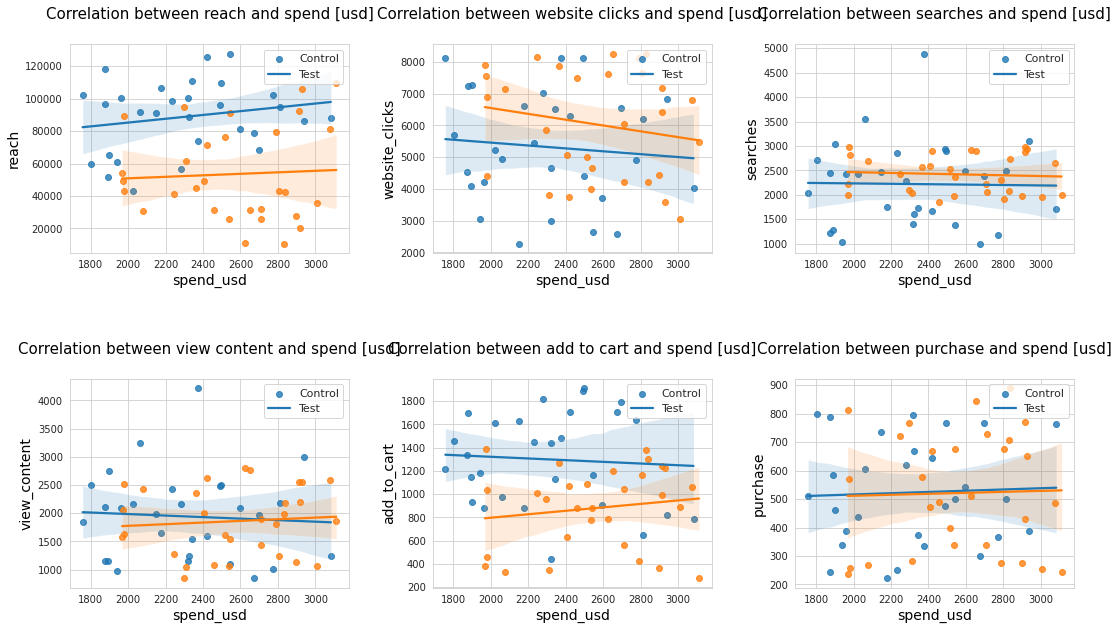

In [33]:
fig, ax = plt.subplots(2,3, figsize=(18,10), sharex=False)
cr = sns.color_palette()

cols= new_df.columns[4:10]

r=0
c=0
i=0

for col in cols:
    hue_regplot(data = new_df, x = "spend_usd", y= col, hue='campaign_name', ax = ax[r,c])
    i+=1
    ax[r,c].set_title("Correlation between {} and spend_[usd]".format(col).replace("_"," "),fontsize=15,color="k", pad=25)
    ax[r,c].set_xlabel("spend_usd", fontsize=14, color="k")
    ax[r,c].set_ylabel(col, fontsize=14, color="k")
    ax[r,c].legend(['Control','Test'], loc= 'upper right', fontsize= 11)
    if c>=2:
        r+=1
        c=-1    
    c+=1          
plt.subplots_adjust(hspace = 0.6, wspace=0.3);        

&#9865; **We find that the only apparent and logical relationship with spending is for each of the two categories(reach and website_ clicks).**<br><br> 

================================================================================================================

<br><br>
<a id='ab_test'></a>
## Part III - A/B Test

#### Since a timestamp is associated with each event, we could run a hypothesis test continuously as long as we observe the events. 

#### However, then the hard questions would be: 
- Do we stop as soon as one landing pages is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do we run to render a decision that neither page is better than another?  

#### These questions are the difficult parts associated with A/B tests in general. But for now, let's keep in mind that we need to make the decision based only on all the data provided.

 

#### So, if we want to make the basic assumption that the old landing page is still better than the new landing page, unless we prove that the new page is definitely better, and besides being able to commit a type 1 error rate "α" of 0.05 or 5%, it will be Our null hypothesis and alternative hypothesis (**$H_0$** and **$H_1$**), are as follows:  

**1. The Null Hypotheses: P_new - P_old <= 0:**
$$H_0: P_{new} - P_{old} \leq 0 $$

**2. The Alternative Hypotheses: P_new - P_old > 0:**
$$H_1: P_{new} - P_{old} > 0 $$ 


#### In this section, we will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `new_df` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



**A.** **We will first do A/B tests on the click-through rate (CTR), as follows:**

In [34]:
reach_cont= new_df.loc[new_df['campaign_name']=='Control Campaign']["reach"].sum()

click_cont= new_df.loc[new_df['campaign_name']=='Control Campaign']["website_clicks"].sum()

ctr_cont = click_cont / reach_cont

In [35]:
reach_test= new_df.loc[new_df['campaign_name']=='Test Campaign']["reach"].sum()

click_test= new_df.loc[new_df['campaign_name']=='Test Campaign']["website_clicks"].sum()

ctr_test = click_test / reach_test

In [36]:
obs_diff_ctr = ctr_test - ctr_cont
obs_diff_ctr

0.052883131704843635

In [37]:
diffs_ctr = []

for i in range(10000):
    b_sample = new_df.sample(new_df.shape[0], replace= True)
    
    samp_rh_cont= b_sample.loc[b_sample['campaign_name']=='Control Campaign']["reach"].sum()
    samp_ck_cont= b_sample.loc[b_sample['campaign_name']=='Control Campaign']["website_clicks"].sum()
    samp_ctr_cont= samp_ck_cont / samp_rh_cont
    
    samp_rh_test= b_sample.loc[b_sample['campaign_name']=='Test Campaign']["reach"].sum()
    samp_ck_test= b_sample.loc[b_sample['campaign_name']=='Test Campaign']["website_clicks"].sum()
    samp_ctr_test= samp_ck_test / samp_rh_test
    
    diffs_ctr.append(samp_ctr_test - samp_ctr_cont)

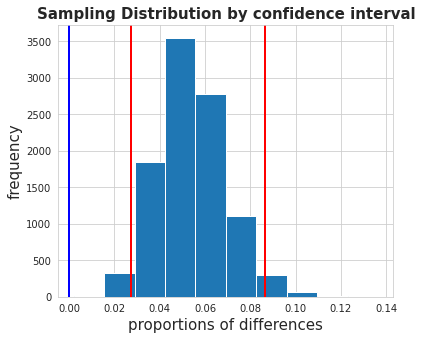

In [38]:
diffs_ctr = np.array(diffs_ctr) # convert to numpy array

low, high = np.percentile(diffs_ctr, 2.5), np.percentile(diffs_ctr, 97.5)

#Looking at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(diffs_ctr)
plt.title('Sampling Distribution by confidence interval', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

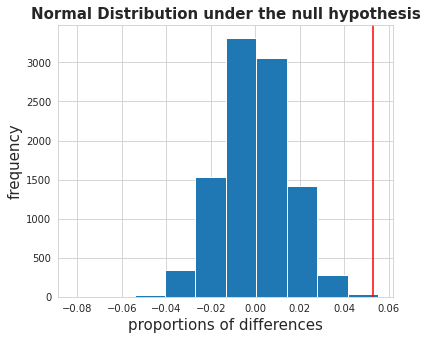

In [39]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
null_vals= np.random.normal(0, diffs_ctr.std(), diffs_ctr.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_diff_ctr, c="red")
plt.title('Normal Distribution under the null hypothesis',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

In [40]:
print("The p-value is: {}".format((null_vals > obs_diff_ctr).mean()))

The p-value is: 0.0002


&#9865; **Here the result of the p-value says we reject the null hypothesis that says that the click-through rate of the test group is less than or equal to the rate of the control group, and therefore we accept the hypothesis that the click-through rate of the test group is greater than the control group.**<br><br>


**B.** **Now let's do A/B tests for average search, content viewing, adding to cart and purchasing.**

In [41]:
search_cont= new_df.loc[new_df['campaign_name']=='Control Campaign']["searches"].mean()
search_test= new_df.loc[new_df['campaign_name']=='Test Campaign']["searches"].mean()

obs_dif_srch= search_test - search_cont

obs_dif_srch

197.65632183908065

In [42]:
diffs_srch = []

for i in range(10000):
    b_sample = new_df.sample(new_df.shape[0], replace= True)
    
    samp_srh_cont= b_sample.loc[b_sample['campaign_name']=='Control Campaign']["searches"].mean()
    samp_srh_test= b_sample.loc[b_sample['campaign_name']=='Test Campaign']["searches"].mean()
    
    diffs_srch.append(samp_srh_test - samp_srh_cont)

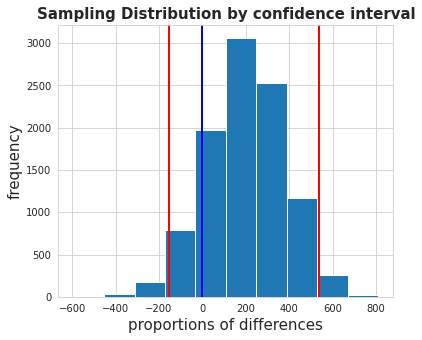

In [43]:
diffs_srch = np.array(diffs_srch) # convert to numpy array

low, high = np.percentile(diffs_srch, 2.5), np.percentile(diffs_srch, 97.5)

#Looking at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(diffs_srch)
plt.title('Sampling Distribution by confidence interval', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

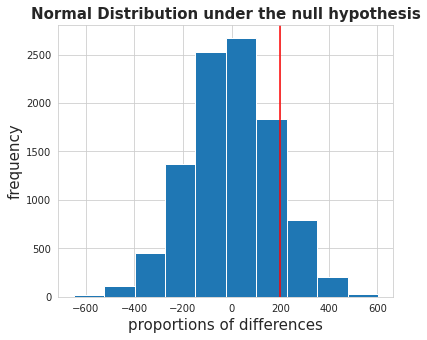

In [44]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
null_vals= np.random.normal(0, diffs_srch.std(), diffs_srch.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_dif_srch, c="red")
plt.title('Normal Distribution under the null hypothesis',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

In [45]:
print("The p-value is: {}".format((null_vals > obs_dif_srch).mean()))

The p-value is: 0.1378


In [46]:
view_cont= new_df.loc[new_df['campaign_name']=='Control Campaign']["view_content"].mean()
view_test= new_df.loc[new_df['campaign_name']=='Test Campaign']["view_content"].mean()

obs_dif_vi= view_test - view_cont

obs_dif_vi

-85.79310344827582

In [47]:
diffs_view = []

for i in range(10000):
    b_sample = new_df.sample(new_df.shape[0], replace= True)
    
    samp_vi_cont= b_sample.loc[b_sample['campaign_name']=='Control Campaign']["view_content"].mean()
    samp_vi_test= b_sample.loc[b_sample['campaign_name']=='Test Campaign']["view_content"].mean()
    
    diffs_view.append(samp_vi_test - samp_vi_cont)

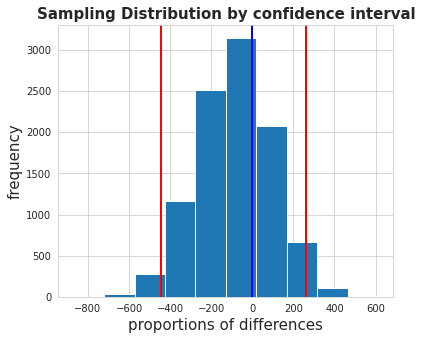

In [48]:
diffs_view = np.array(diffs_view) # convert to numpy array

low, high = np.percentile(diffs_view, 2.5), np.percentile(diffs_view, 97.5)

#Looking at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(diffs_view)
plt.title('Sampling Distribution by confidence interval', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

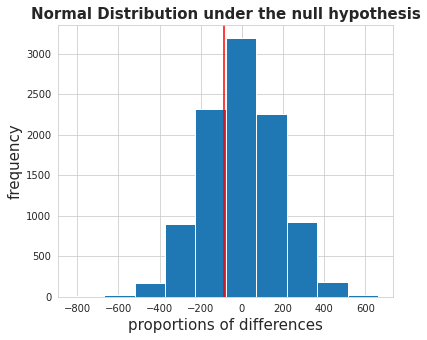

In [49]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
null_vals= np.random.normal(0, diffs_view.std(), diffs_view.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_dif_vi, c="red")
plt.title('Normal Distribution under the null hypothesis',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

In [50]:
print("The p-value is: {}".format((null_vals > obs_dif_vi).mean()))

The p-value is: 0.6743


In [51]:
cart_cont= new_df.loc[new_df['campaign_name']=='Control Campaign']["add_to_cart"].mean()
cart_test= new_df.loc[new_df['campaign_name']=='Test Campaign']["add_to_cart"].mean()

obs_dif_ct= cart_test - cart_cont

obs_dif_ct

-418.4666666666667

In [52]:
diffs_cart = []

for i in range(10000):
    b_sample = new_df.sample(new_df.shape[0], replace= True)
    
    samp_ct_cont= b_sample.loc[b_sample['campaign_name']=='Control Campaign']["add_to_cart"].mean()
    samp_ct_test= b_sample.loc[b_sample['campaign_name']=='Test Campaign']["add_to_cart"].mean()
    
    diffs_cart.append(samp_ct_test - samp_ct_cont)

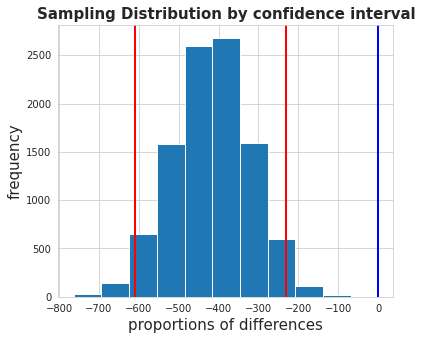

In [53]:
diffs_cart = np.array(diffs_cart) # convert to numpy array

low, high = np.percentile(diffs_cart, 2.5), np.percentile(diffs_cart, 97.5)

#Looking at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(diffs_cart)
plt.title('Sampling Distribution by confidence interval', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

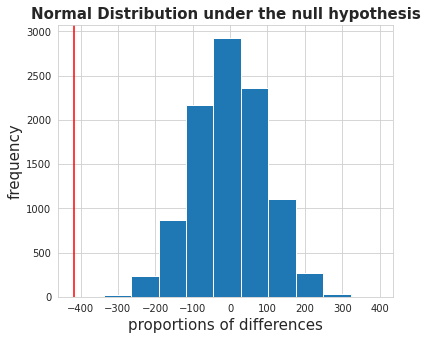

In [54]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
null_vals= np.random.normal(0, diffs_cart.std(), diffs_cart.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_dif_ct, c="red")
plt.title('Normal Distribution under the null hypothesis',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

In [55]:
print("The p-value is: {}".format((null_vals > obs_dif_ct).mean()))

The p-value is: 1.0


In [56]:
pur_cont= new_df.loc[new_df['campaign_name']=='Control Campaign']["purchase"].mean()
pur_test= new_df.loc[new_df['campaign_name']=='Test Campaign']["purchase"].mean()

obs_dif_pur= pur_test - pur_cont

obs_dif_pur

-1.5597701149424665

In [57]:
diffs_pur = []

for i in range(10000):
    b_sample = new_df.sample(new_df.shape[0], replace= True)
    
    samp_pur_cont= b_sample.loc[b_sample['campaign_name']=='Control Campaign']["purchase"].mean()
    samp_pur_test= b_sample.loc[b_sample['campaign_name']=='Test Campaign']["purchase"].mean()
    
    diffs_pur.append(samp_pur_test - samp_pur_cont)

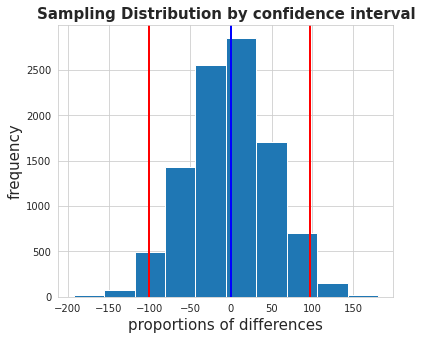

In [58]:
diffs_pur = np.array(diffs_pur) # convert to numpy array

low, high = np.percentile(diffs_pur, 2.5), np.percentile(diffs_pur, 97.5)

#Looking at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(diffs_pur)
plt.title('Sampling Distribution by confidence interval', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

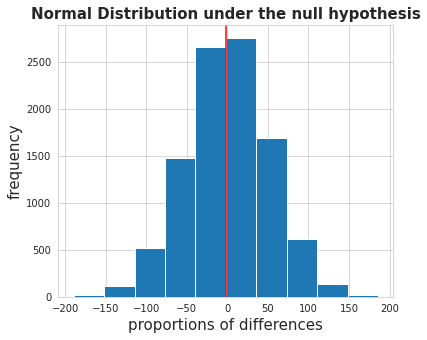

In [59]:
#Looking at the sampling distribution as a normal distribution under the null hypothesis through the histogram
null_vals= np.random.normal(0, diffs_pur.std(), diffs_pur.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_dif_pur, c="red")
plt.title('Normal Distribution under the null hypothesis',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

In [60]:
print("The p-value is: {}".format((null_vals > obs_dif_pur).mean()))

The p-value is: 0.5197


&#9865; **We find through the results of the probabilistic value of each of the previous four categories that there is no statistical evidence that the average of each of them in the test group is greater than the control group, but this is based on comparing each of them independently with the error rate of the first type by 0.05.**<br><br>

**Since each of the previous four categories are related to each other and to be fairer, we must divide the error rate of the first type among them and at the same time in an unbiased way, so the best way to do this is by using the 'holm–bonferroni' theorem, as follows:**

In [61]:
hb = {'searches': 0.1352, # first rank
      'purchase':0.5147, # second rank
      'view content':0.6819, # thrid rank
      'add to cart':1} # fourth rank
n= 1
a= 0.05
for key in hb:
    p_value= hb[key]
    hb_rank= a/((len(hb)-n)+1)
    n += 1
    
    if p_value > hb_rank:   
        print("\nThe Rank of {}: p-vlaue({}) > α({}) Fail Reject Null Hypotheses".
              format(key,np.round(p_value, decimals = 3),np.round(hb_rank, decimals = 3)))
    else:
        print("\nThe Rank of {}: p-vlaue({}) < α({}) Reject Null Hypotheses".
              format(key,np.round(p_value, decimals = 3),np.round(hb_rank, decimals = 3)))


The Rank of searches: p-vlaue(0.135) > α(0.012) Fail Reject Null Hypotheses

The Rank of purchase: p-vlaue(0.515) > α(0.017) Fail Reject Null Hypotheses

The Rank of view content: p-vlaue(0.682) > α(0.025) Fail Reject Null Hypotheses

The Rank of add to cart: p-vlaue(1) > α(0.05) Fail Reject Null Hypotheses


&#9865; **He extracted for us the same previous results that there is no statistical evidence for any group of them that the mean of the test group is greater than the control**<br><br> 

==================================================================================================================

<br><br>

<a id='regression'></a>
### Part IV - A regression approach


#### In this final part, we will see the follows:

- the result you achieved in the A/B test in Part II above can also be achieved by performing regression.
- A/B tests take an aggregate approach to the conclusions reached based on the data set, which aims to understand the parameters of the population (total population values).
- Instead, a machine learning technique such as regression takes a more individualistic and nuanced approach to drawing conclusions, aiming to predict the outcome of each point in a given data set.<br><br> 

&#9865; **Since the first response variable we'll be working on is the `ctr` variable, it's a 0 to 1 ratio, so the most appropriate type of regression to use is logistic regression, but before that we're going to convert these rates to just two values either "1" which means that ctr is greater than The mean or "0" means that ctr is equal or less than the mean, then it is a binary categorical variable.**


**A.** Let's turn `ctr` into a binary dummy numeric variable

In [62]:
ab_ctr= []
for i in new_df['ctr']:
    if np.round(i, decimals = 3) > np.round(new_df.ctr.mean(), decimals = 3):
        ab_ctr.append(1)
    else:
        ab_ctr.append(0)
new_df['ab_ctr'] = ab_ctr

new_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,ab_ctr
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.123239,1
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,0.084813,0
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,0.102032,0
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0.024952,0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,0.052605,0


**Our first response variable and its results depend on the expectation variable, which in our case here is represented by both the campaign variable and the spending variable.**

**But since the campaign variable is a categorical variable, we will first convert it to a dummy variable so that it becomes a numeric value for use in predictions, as follows:**

In [63]:
new_df[['control', 'test']]= pd.get_dummies(new_df['campaign_name'])
new_df.drop('control', axis= 1, inplace= True)
new_df.rename(columns={'test': 'ab_page'}, inplace= True)

new_df.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,ctr,ab_ctr,ab_page
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.123239,1,0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,0.084813,0,1
2,Test Campaign,2019-10-08,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,0.102032,0,1
3,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0.024952,0,0
4,Test Campaign,2019-11-08,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,0.052605,0,1


<br><br> 
**B.** Let's use statsmodels to instantiate our regression model on the two columns we created in part (a). Above, adding another spending column and then doing a model-fit to predict whether or not an individual will convert.

In [64]:
import statsmodels.formula.api as smf

log_mod = smf.logit(formula="ab_ctr ~ ab_page + spend_usd", data= new_df).fit()

log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.455599
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 ab_ctr   No. Observations:                   59
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Sun, 04 Sep 2022   Pseudo R-squ.:                  0.2593
Time:                        10:00:25   Log-Likelihood:                -26.880
converged:                       True   LL-Null:                       -36.292
Covariance Type:            nonrobust   LLR p-value:                 8.180e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7028      2.335      0.301      0.763      -3.873       5.278
ab_page        3.2464      0.937      3.466      0.001       1.410       5.082
spend_usd     -0.0015      0.001     -1.445      0.148      -0.003       0.001
==============================================================================
"""

- First, an LLR p-value of 8.1801e-05 (0.000081801) indicates that the model is generally statistically significant because it is less than 0.05, which allows us to look at the rest of the results.<br><br> 

- Second, if we look at the independent variables represented by the two coefficients (campaign and spending), we find that it is the campaign coefficient that has a significant effect on the log odds of CTR.<br><br> 

- So, since the dummy variable "Control" has been dropped from the analysis, it is considered the comparison group and the interpretation of the other category, which is "test".<br><br> 

- We can say if the campaign is of the test type compared to the campaign of the control type, there is an ascending ratio of 3.2464 in the log odds of the click-through rate(CTR).<br><br> 

**In fact, the interpretation of log odds is not a very obvious thing to think about its effects, so the easiest way to interpret the results is to convert the logistic regression model coefficients into odds ratio, where we can do this by using the exponential for the coefficient value and confidence intervals, as follows:**

In [65]:
model_odds= pd.DataFrame(np.exp(log_mod.params), columns=['OR'])
model_odds['p-value']= log_mod.pvalues
model_odds[['2.5%', '97.5']]= np.exp(log_mod.conf_int())
model_odds

,OR,p-value,2.5%,97.5
Intercept,2.019400,0.763379,0.020800,196.053139
ab_page,25.696564,0.000529,4.097697,161.142575
spend_usd,0.998517,0.148446,0.996509,1.000529


&#9865; **We can now interpret the result of the coefficient "ab_page", that the campaign with the test type compared to the campaign with the control type is likely to have a greater CTR by a factor of 25.70.**<br><br> 


**Since the following response variables that we will work on are (search, content viewing, adding to cart and purchasing), the most appropriate type of regression used for them is linear regression.**<br><br>

**The second response variable that we will deal with is searches, and if we look at the expectation variables that are likely to be affected by them (ab_page, ab_ctr, spend_usd).**<br><br> 

**C.** Let's make a fit of the model to the `search` variable

In [66]:
import statsmodels.api as sms

new_df['intercept'] = 1 

lm2 = sms.OLS(new_df['searches'], new_df[['intercept', 'ab_page', 'ab_ctr', 'spend_usd']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               searches   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.5210
Date:                Sun, 04 Sep 2022   Prob (F-statistic):              0.670
Time:                        10:00:26   Log-Likelihood:                -466.23
No. Observations:                  59   AIC:                             940.5
Df Residuals:                      55   BIC:                             948.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2424.5420    607.747      3.989      0.000    1206.590    3642.494
ab_page      272.1044    221.811      1.227      0.225    -172.414     716.623
ab_ctr      -113.0120    225.920     -0.500      0.619    -565.766     339.742
spend_usd     -0.0848      0.257     -0.330      0.742      -0.599       0.430
==============================================================================
Omnibus:                       17.289   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.786
Skew:                           0.923   Prob(JB):                     2.06e-07
Kurtosis:                       6.019   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
new_df['ctr_page']= new_df['ab_ctr'] * new_df['ab_page']

In [68]:
lm2 = sms.OLS(new_df['searches'], new_df[['intercept', 'ab_page', 'ab_ctr', 'ctr_page', 'spend_usd']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               searches   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.4618
Date:                Sun, 04 Sep 2022   Prob (F-statistic):              0.763
Time:                        10:00:26   Log-Likelihood:                -466.07
No. Observations:                  59   AIC:                             942.1
Df Residuals:                      54   BIC:                             952.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2408.2465    612.342      3.933      0.000    1180.575    3635.918
ab_page      321.9947    240.863      1.337      0.187    -160.907     804.897
ab_ctr       133.4477    501.431      0.266      0.791    -871.860    1138.755
ctr_page    -307.9864    558.492     -0.551      0.584   -1427.695     811.722
spend_usd     -0.0851      0.258     -0.330      0.743      -0.603       0.433
==============================================================================
Omnibus:                       18.801   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.727
Skew:                           0.995   Prob(JB):                     2.88e-08
Kurtosis:                       6.188   Cond. No.                     2.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, x = dmatrices("searches ~ ab_page + ab_ctr + ctr_page + spend_usd", new_df, return_type="dataframe")
vif = pd.DataFrame()
vif["vector_1"] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["futears_1"] = x.columns
vif

,vector_1,futears_1
0,47.589218,Intercept
1,1.840254,ab_page
2,6.765418,ab_ctr
3,7.824177,ctr_page
4,1.179363,spend_usd


&#9865; **From the previous results, we did not find any statistical evidence that any of the previous coefficients had an effect on the search rate, and this is also after we added the so-called interaction process between ab_page and ab_ctr to the logistic regression, and made sure that there was no variance inflation factor(VIFs) that could affect the process results.**<br><br>

**The Third response variable that we will deal with is view content, and if we look at the expectation variables that are likely to be affected by them (ab_page, ab_ctr, spend_usd, searches).**<br><br>

**D.** Let's make a fit of the model to the `view_content` variable

In [70]:
lm3 = sms.OLS(new_df['view_content'], new_df[['intercept', 'ab_page', 'ab_ctr',
                                                  'ctr_page', 'searches', 'spend_usd']])
results3 = lm3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           view_content   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     56.59
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           4.80e-20
Time:                        10:00:27   Log-Likelihood:                -414.17
No. Observations:                  59   AIC:                             840.3
Df Residuals:                      53   BIC:                             852.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -403.4086    290.891     -1.387      0.171    -986.861     180.044
ab_page     -388.0618    102.538     -3.785      0.000    -593.726    -182.397
ab_ctr       105.5834    210.154      0.502      0.617    -315.932     527.099
ctr_page      74.7644    234.573      0.319      0.751    -395.730     545.259
searches       0.9543      0.057     16.744      0.000       0.840       1.069
spend_usd      0.0955      0.108      0.882      0.382      -0.122       0.313
==============================================================================
Omnibus:                        1.534   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.531
Skew:                          -0.357   Prob(JB):                        0.465
Kurtosis:                       2.662   Cond. No.                     2.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
y, x = dmatrices("view_content ~ ab_page + ab_ctr + ctr_page + searches + spend_usd",
                 new_df, return_type="dataframe")
vif = pd.DataFrame()
vif["vector_1"] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["futears_1"] = x.columns
vif

,vector_1,futears_1
0,61.220254,Intercept
1,1.901157,ab_page
2,6.774291,ab_ctr
3,7.868240,ctr_page
4,1.034208,searches
5,1.181735,spend_usd


- From the previous results, we find that the two coefficients with statistical significance are (ab_page, searches).<br><br>

- We can interpret the result of the ab_page coefficient, that for each missing unit in the numbers of the campaign with the type of test, the number of content views is also likely to decrease by 388.<br><br>


- Interpreting the result of the searches coefficient, that for each decrease unit in searches, it is likely that the view content will increase by 0.954!.<br><br>

**The Fourth response variable that we will deal with is add to cart, and if we look at the expectation variables that are likely to be affected by them (ab_page, ab_ctr, spend_usd, searches, view_content).**<br><br>

**E.** Let's make a fit of the model to the `add_to_cart` variable

In [72]:
lm4 = sms.OLS(new_df['add_to_cart'], new_df[['intercept', 'ab_page', 'ab_ctr',
                                                  'ctr_page', 'searches',
                                                 'view_content','spend_usd']])
results4 = lm4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            add_to_cart   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.526
Date:                Sun, 04 Sep 2022   Prob (F-statistic):            0.00530
Time:                        10:00:27   Log-Likelihood:                -430.94
No. Observations:                  59   AIC:                             875.9
Df Residuals:                      52   BIC:                             890.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      995.0804    397.218      2.505      0.015     198.003    1792.157
ab_page       -418.1500    155.020     -2.697      0.009    -729.220    -107.080
ab_ctr         441.8704    282.572      1.564      0.124    -125.152    1008.893
ctr_page      -409.9313    314.959     -1.302      0.199   -1041.943     222.080
searches         0.0121      0.192      0.063      0.950      -0.373       0.397
view_content     0.0562      0.184      0.305      0.762      -0.314       0.426
spend_usd        0.0600      0.146      0.410      0.683      -0.234       0.354
==============================================================================
Omnibus:                        7.140   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                3.283
Skew:                          -0.312   Prob(JB):                        0.194
Kurtosis:                       2.027   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
y, x = dmatrices("add_to_cart ~ ab_page + ab_ctr + ctr_page + searches + view_content + spend_usd",
                 new_df, return_type="dataframe")
vif = pd.DataFrame()
vif["vector_1"] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["futears_1"] = x.columns
vif

,vector_1,futears_1
0,63.441774,Intercept
1,2.414937,ab_page
2,6.806554,ab_ctr
3,7.883321,ctr_page
4,6.505036,searches
5,6.338447,view_content
6,1.199068,spend_usd


&#9865; **From the previous results, we find that a single coefficients is statistically significant, which is ab_page, so we can interpret its result that for each unit an increase in the numbers of the campaign with the test type, it is likely that the add to cart will decrease by 418!.**<br><br>

**The Fifth response variable that we will deal with is add to cart, and if we look at the expectation variables that are likely to be affected by them (ab_page, ab_ctr, spend_usd, searches, view_content, add_to_cart).<br><br>

**F.** Let's make a fit of the model to the `purchase` variable

In [74]:
lm5 = sms.OLS(new_df['purchase'], new_df[['intercept', 'ab_page', 'ab_ctr',
                                                  'ctr_page', 'searches',
                                                 'view_content', 'add_to_cart', 'spend_usd']])
results5 = lm5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               purchase   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1.893
Date:                Sun, 04 Sep 2022   Prob (F-statistic):             0.0900
Time:                        10:00:27   Log-Likelihood:                -388.10
No. Observations:                  59   AIC:                             792.2
Df Residuals:                      51   BIC:                             808.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      234.3153    205.441      1.141      0.259    -178.125     646.756
ab_page        117.6153     80.861      1.455      0.152     -44.721     279.951
ab_ctr        -104.9717    141.262     -0.743      0.461    -388.566     178.623
ctr_page        77.7842    156.362      0.497      0.621    -236.126     391.695
searches        -0.0381      0.094     -0.406      0.686      -0.226       0.150
view_content     0.0343      0.090      0.381      0.705      -0.147       0.215
add_to_cart      0.2421      0.068      3.573      0.001       0.106       0.378
spend_usd       -0.0005      0.072     -0.007      0.994      -0.144       0.143
==============================================================================
Omnibus:                        1.865   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.262
Skew:                          -0.032   Prob(JB):                        0.532
Kurtosis:                       2.286   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
y, x = dmatrices("purchase ~ ab_page + ab_ctr + ctr_page + searches + view_content + add_to_cart + spend_usd",
                 new_df, return_type="dataframe")
vif = pd.DataFrame()
vif["vector_1"] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["futears_1"] = x.columns
vif

,vector_1,futears_1
0,71.098262,Intercept
1,2.752841,ab_page
2,7.126632,ab_ctr
3,8.140136,ctr_page
4,6.505538,searches
5,6.349779,view_content
6,1.406827,add_to_cart
7,1.202945,spend_usd


&#9865; **From the previous results we found that there is one parameter that is statistically significant and that is add_to_cart , so we can interpret its result that for each unit increase in the numbers of add to cart, purchases are likely to increase by 0.24.**<br><br>

=================================================================================================================

<br><br>
<a id='Concl'></a>
## Conclusions

#### A. Descriptive Statistics Conclutions:

- The number of campaigns in the two groups was approximately equal, which suggests that there would be no bias in the results.<br><br>

- When we extract the number of unique ad views on the landing page for each group, we found that the number of views in the control group is almost double the number of views in the test group, which is likely to lead to a significant bias in the results in favor of the control group.<br><br>

- When we calculated the click-through (CTR) rate for both groups, we found that this time the rate for the test group became twice that of the control group.<br><br>

- When we counted the number of people who clicked on the site link for both groups, we found that those who clicked the site link who viewed the ad in the test group were greater in most months than the control group, which explains why the differences in previous results occurred.<br><br>

- When we extract average spending for both groups, we also actually find that there is a large spending gap in most months in favor of the test group.<br><br>

- So, it is likely that most of the above results were caused by the following reasons:<br><br>

  **1.** Despite spending less on the control group's ad campaigns and getting more unique views, these views were not from highly targeted people for the landing page.
  
  **2.** On the other hand, the test group spent more on ad campaigns and got fewer unique views, but these views were for more highly targeted individuals for the landing page, which led to most of them clicking on the site link.<br><br><br><br>
  
 
 
#### B. A/B Test  & Regression Analysis Conclutions:
 
- When we did a/b tests and regression for the click-through rates (CTR), we found that we had statistical evidence that the test group had a higher (CTR) than the control group.<br><br>

- In spite of that, when we performed the same tests for (search, content viewing, add to cart and purchasing), we found that there is no statistical evidence that there is a difference in the averages of each of them in the test group from the control group.<br><br><br><br>


**Based on the previously mentioned results, we believe that we should do the experiment for a longer period, taking into account the following things:**

- Ensure that the advertising campaigns are prepared correctly, to attract strong and equal target individuals to both groups.<br><br>
- There must be enough views and clicks to get meaningful and repeatable results.<br><br>
- Practical importance of click-through rate versus statistical significance, eg (cost of launching a new ad versus profit from increased purchases).<br><br>